# Exploring results of $T_{stop}$ measures

In [1]:
# Install dependencies
# !pip install numpy matplotlib

In [2]:
import csv
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# CSV_FILE should be generated by measure_t_stop.py. See README.md.
CSV_FILE = "results.csv"

x, y = [], []
with open(CSV_FILE, "rt") as csv_fd:
    csv_reader = csv.DictReader(csv_fd, delimiter=",")
    for doc in csv_reader:
        x.append(float(doc["load_average_1m"]))
        y.append(float(doc["init_to_stop_ms"]))

print(f"Found {len(x)} values")

Found 2923 values


In [4]:
# Bucketize values
n_bins = round(max(x))
indices = np.digitize(x, range(0, n_bins+1), right=False)  # bins[i-1] <= x < bins[i]

buckets = [[] for _ in range(n_bins)]
for i in range(len(x)):
    bin_idx = indices[i]
    buckets[bin_idx-1].append(y[i])

for i in range(len(buckets)):
    print(f"[{i}-{i+1}[ -> {len(buckets[i])} values")

[0-1[ -> 7 values
[1-2[ -> 1620 values
[2-3[ -> 284 values
[3-4[ -> 199 values
[4-5[ -> 181 values
[5-6[ -> 178 values
[6-7[ -> 161 values
[7-8[ -> 171 values
[8-9[ -> 122 values


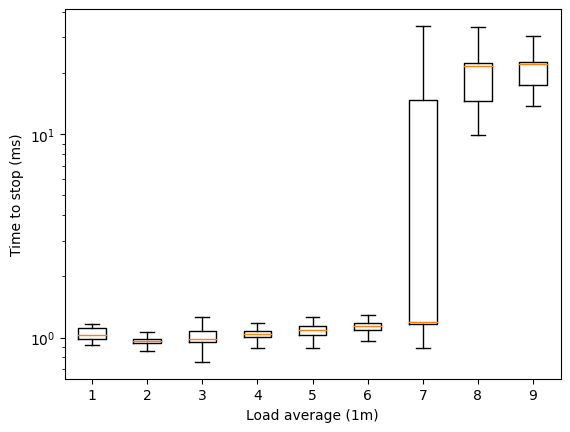

In [5]:
# Print boxplot
plt.boxplot(buckets, showfliers=False)
plt.yscale('log')
plt.xlabel("Load average (1m)")
plt.ylabel("Time to stop (ms)")
plt.show()